# Prediction using Decision Tree Algorithm

* Create the Decision Tree classifier and visualize it graphically.
* The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.

    
## Import data and libraries

In [13]:
# import all the library required
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

The dataset is 'iris dataset' which can be imported from the scikitlearn directly through ***load_iris()*** or check the [document](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). As we want to make a prediction using Decision Tree Classifier, **X as feature** and **y as label** are as the following:

In [54]:
# load data and keep in X and y
X, y = load_iris(return_X_y=True)
# display
print('*The name of each feature is\n\n', load_iris().feature_names,'\n')
print('The first five data points of four features (X) are \n\n', X[:5,],'\n')
print('The name of each label is\n\n', load_iris().target_names,'\n')
print('The labels (y) are\n\n', y, '\n')

*The name of each feature is

 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

The first five data points of four features (X) are 

 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] 

The name of each label is

 ['setosa' 'versicolor' 'virginica'] 

The labels (y) are

 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] 



As you can see, there are three different types of labels 


| label number | label name   |
|------|------|
|   0  | setosa|
|   1  | versicolor|
|   2  | virginica|

Four different types of feature

| Feature (cm) |
|------|
|   sepal length  | 
|   sepal width  |
|   petal length  | 
|petal width|


## Split the dataset
split the dataset into train set and test set

In [53]:
# create training and testing vars 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Build decision tree
Now it is time to train the sample using ***DecisionTreeClassifier()*** and build a decision tree from the training set (X,y).

In [19]:
# build decision tree 
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

After being fitted, the model then can be used to predict any new data point. 

In [26]:
# predict example using the trained model clf
y_pred = clf.predict(X_test)
test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
test.head()

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1


Another thing is we can also predict the probability of each class or label. The example below shown the probability of each label from 0 to 2 respectively. 
* The probability of being setosa (0) is 0
* The probability of being 	versicolor (1) is 1
* The probability of being virginica (2) is 0

In [48]:
# probability predicted example using the trained model clf
prob = clf.predict_proba(X_test)
prob[0]

array([0., 1., 0.])

## Measure the accuracy
* accuracy score 
* confusion matrix

In [46]:
# accuracy score
print('The accuracy score is', accuracy_score(y_test, y_pred))
print('The number of correctly classified sample is', accuracy_score(y_test, y_pred, normalize=False))
print('The size of testing setis also', len(y_test))

The accuracy score is 1.0
The number of correctly classified sample is 45
The size of testing setis also 45


In [35]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

From confusion matrix, you can see that all number is on diagonal line meaning that all data is correctly classified: 19, 13, and 13 for setosa, versicolor and virginica respectively.
## Plot decision tree

[Text(343.38461538461536, 1009.5428571428572, 'X[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(257.53846153846155, 854.2285714285715, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(429.23076923076917, 854.2285714285715, 'X[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(171.69230769230768, 698.9142857142858, 'X[3] <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(85.84615384615384, 543.6, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(257.53846153846155, 543.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(686.7692307692307, 698.9142857142858, 'X[3] <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(429.23076923076917, 543.6, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(343.38461538461536, 388.28571428571433, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(515.0769230769231, 388.28571428571433, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(429

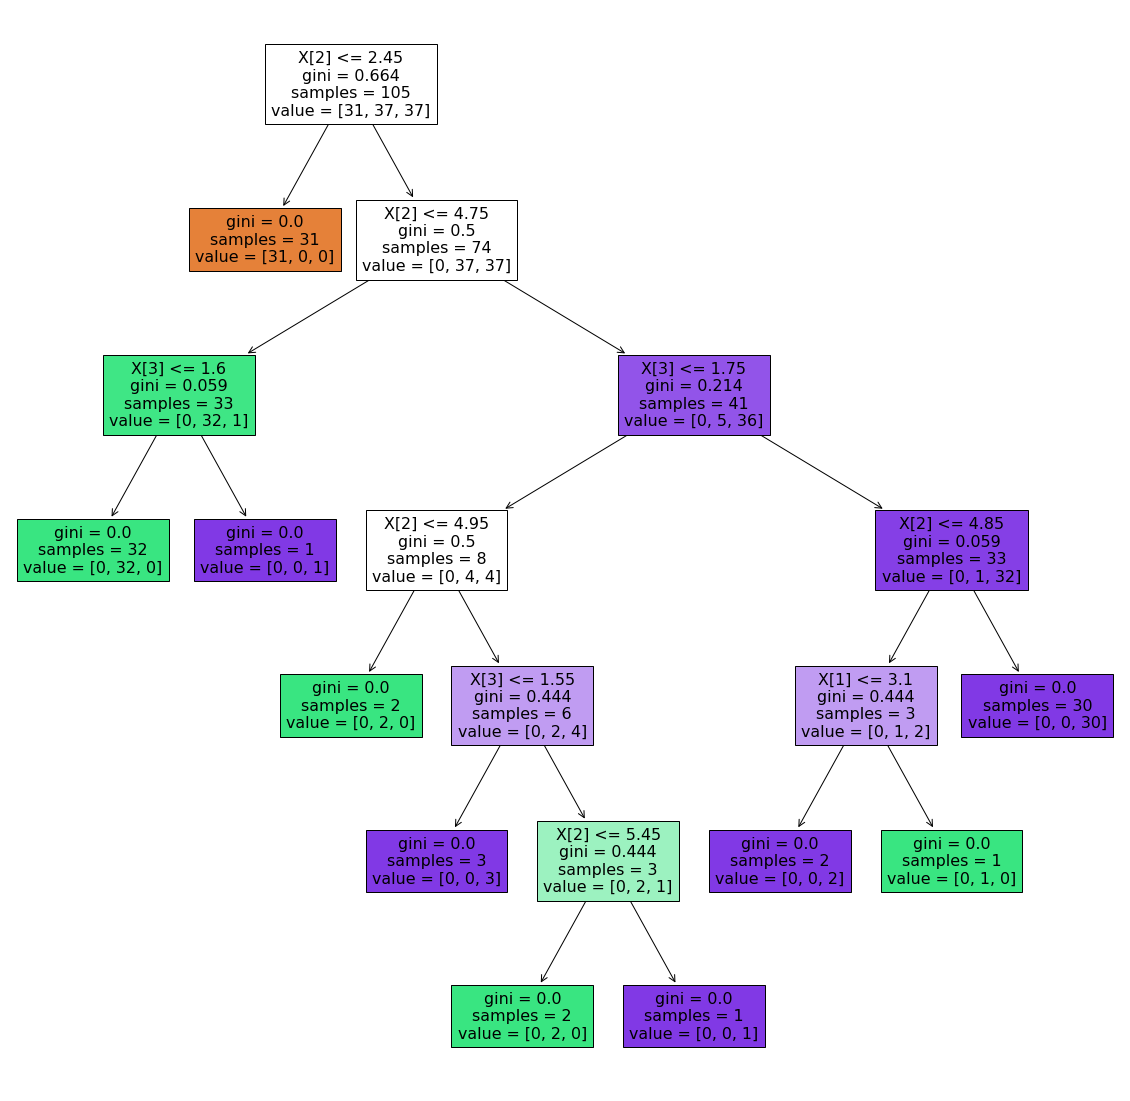

In [52]:
# set the graphic size
plt.figure(figsize = (20,20))
# plot using plot_tree
plot_tree(clf, filled=True) 